# 2)PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

##Dataset : Forest fire

In [1]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
fire = pd.read_csv("forestfires (1).csv")
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


EDA AND DATA PROCESSING

In [3]:
fire.shape

(517, 31)

In [4]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
fire.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
# Dropping columns which are not required

fire = fire.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
fire


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [8]:
# Checking how much datapoints are having small and large area
fire.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

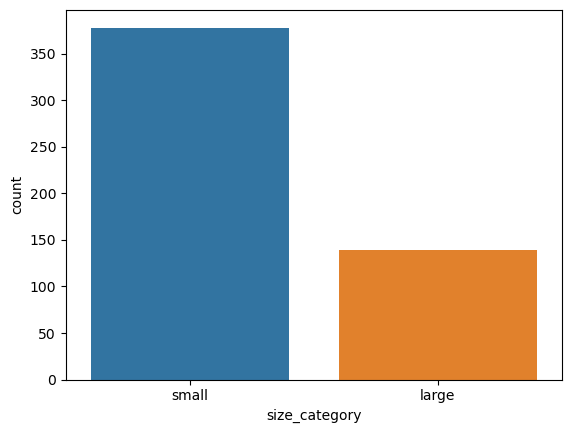

In [9]:
import seaborn as sns
sns.countplot(x = 'size_category', data = fire)

In [10]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(fire.area, fire.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


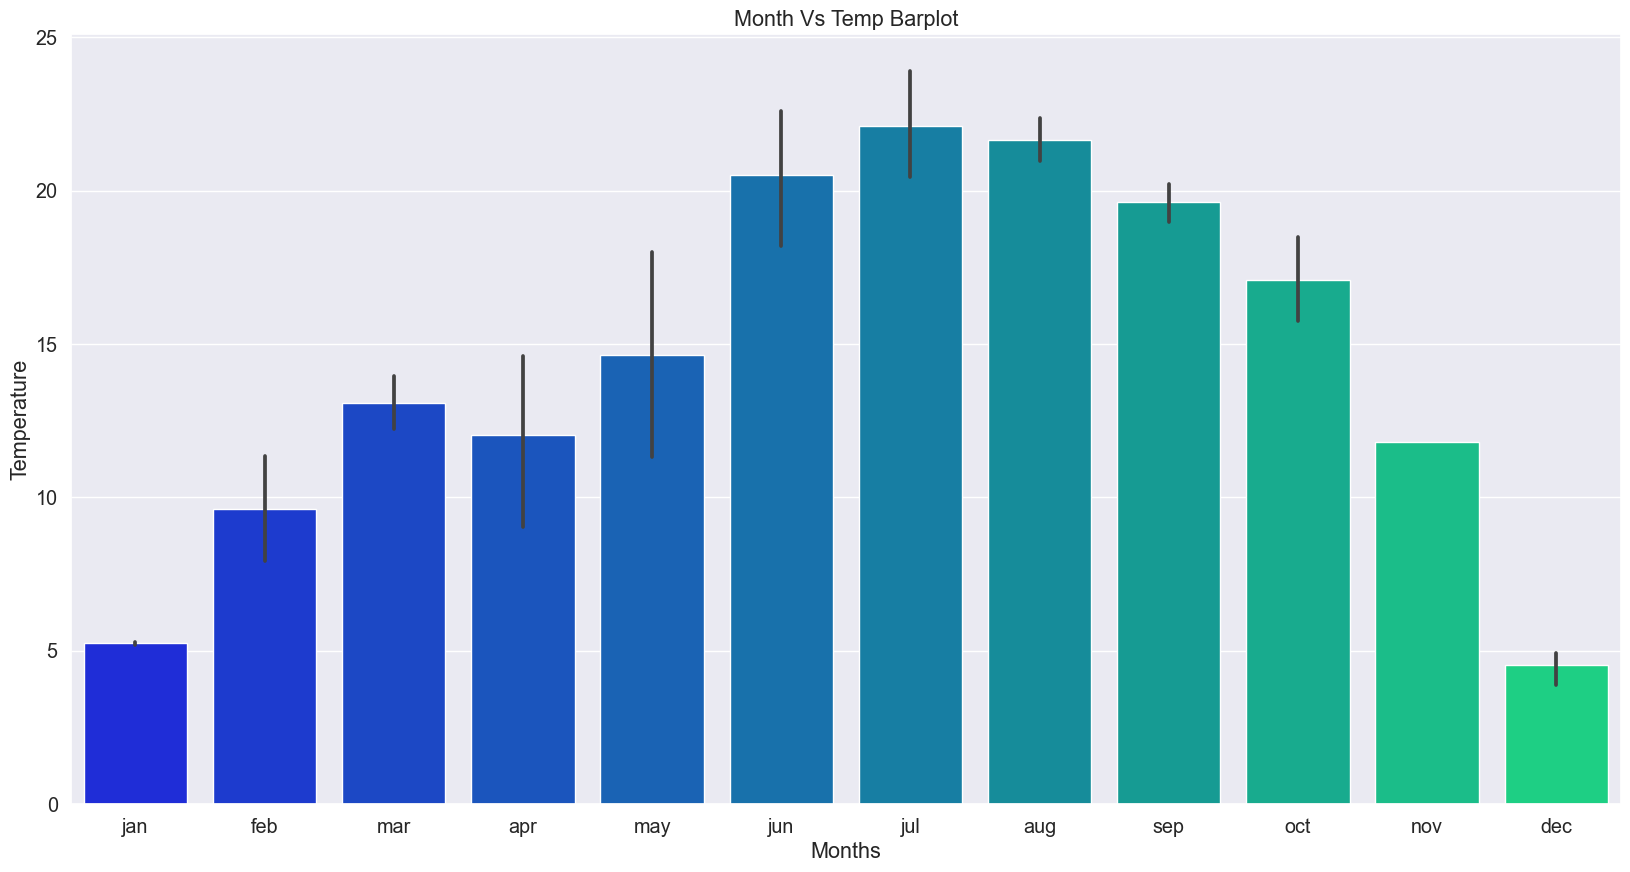

In [11]:
# Plotting Month Vs. temp plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = fire,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

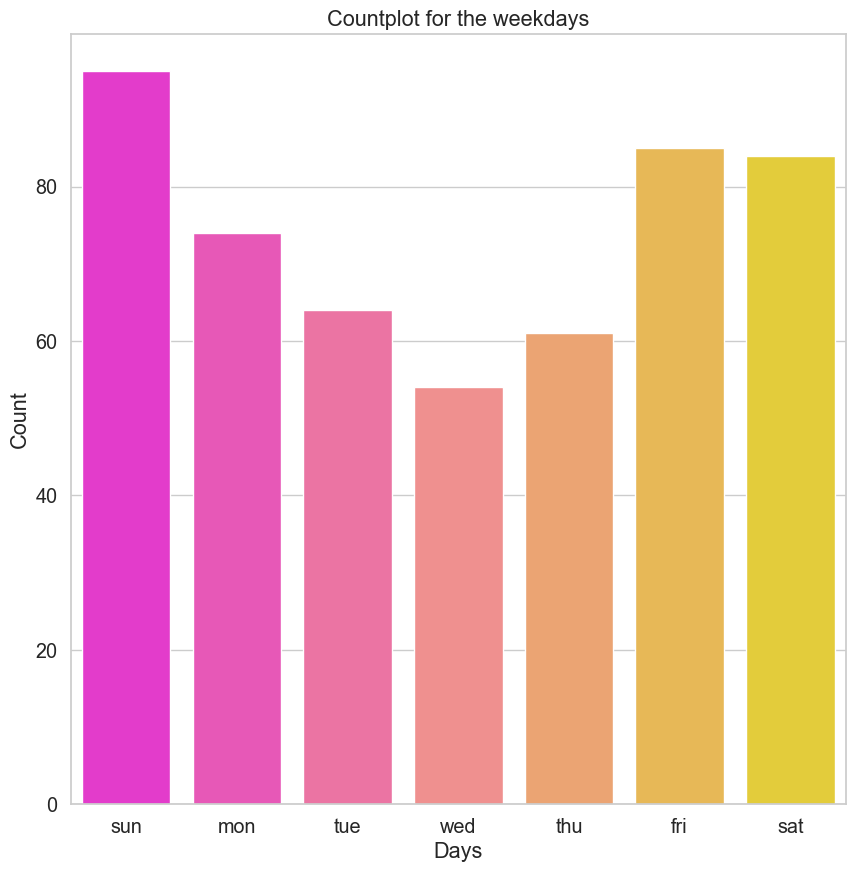

In [12]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style='whitegrid', font_scale=1.3)

day = sns.countplot(data=fire, x='day', order=['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette='spring')

day.set(title='Countplot for the weekdays', xlabel='Days', ylabel='Count')

plt.show()

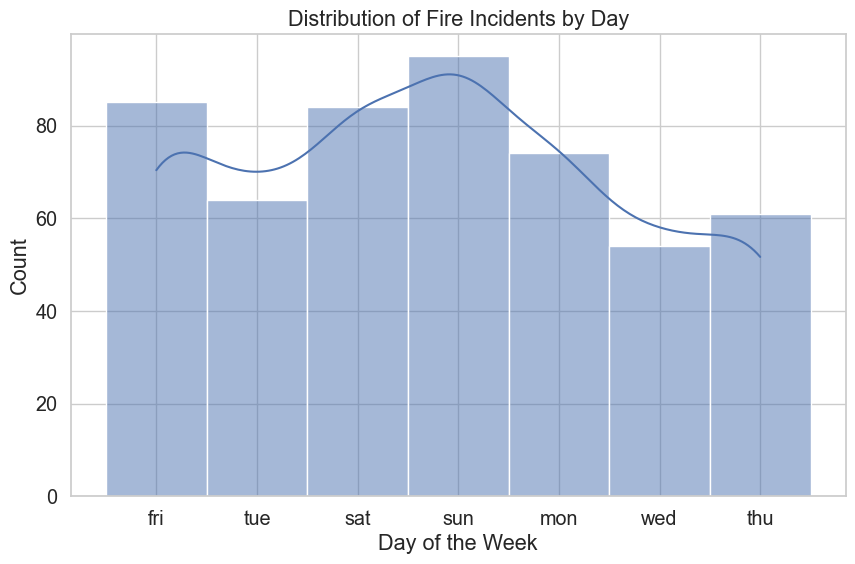

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fire, x='day', bins=7, kde=True, palette='spring')
plt.title('Distribution of Fire Incidents by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

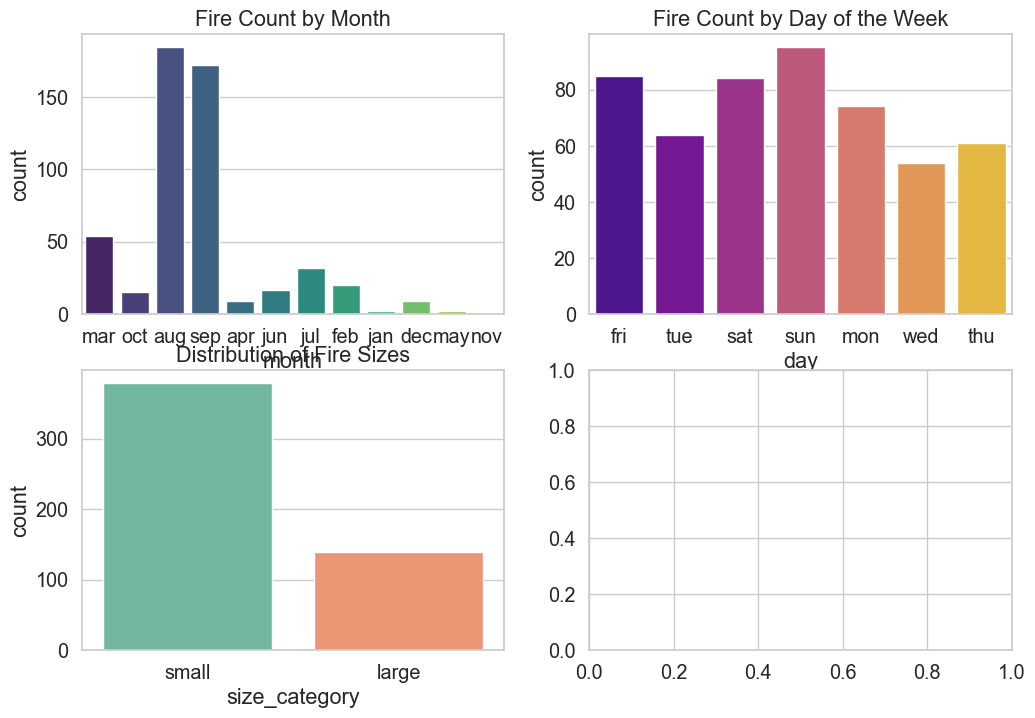

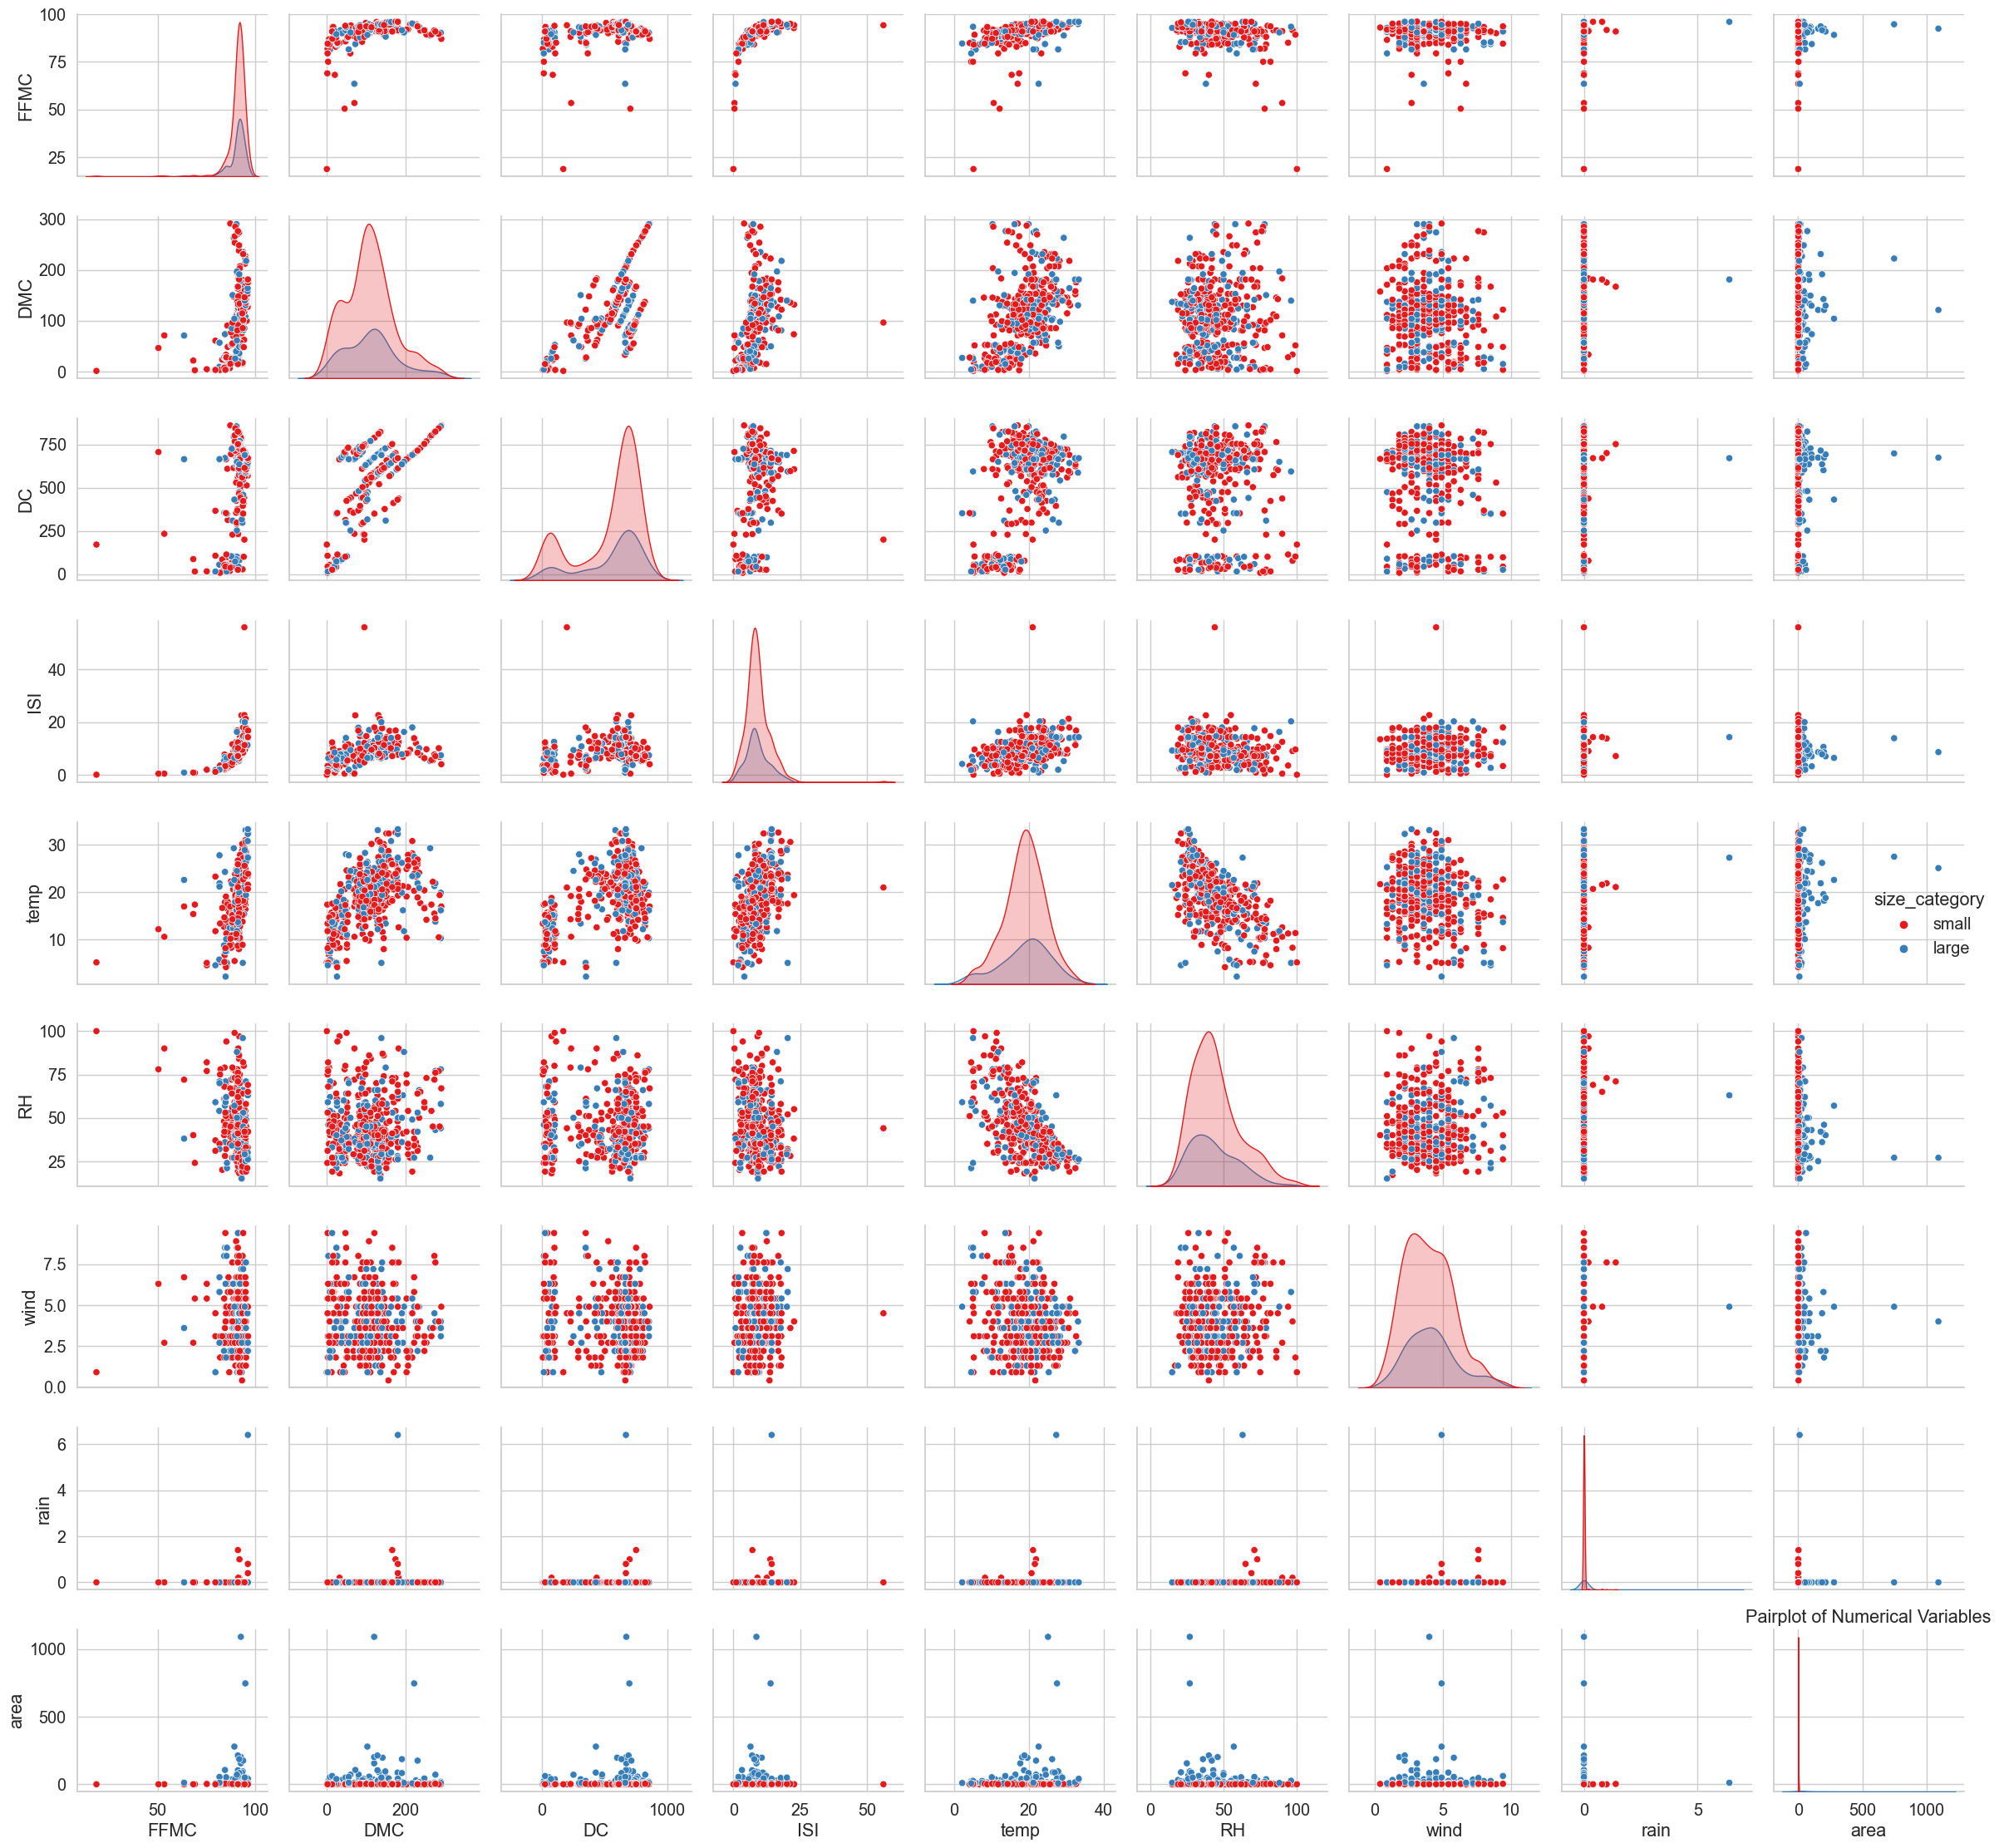

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt



# Set a larger figure size for better visualization
plt.figure(figsize=(12, 8))

# 1. Bar plot of fire count by month
plt.subplot(2, 2, 1)
sns.countplot(data=fire, x='month', palette='viridis')
plt.title('Fire Count by Month')

# 2. Bar plot of fire count by day of the week
plt.subplot(2, 2, 2)
sns.countplot(data=fire, x='day', palette='plasma')
plt.title('Fire Count by Day of the Week')

# 3. Distribution of fire sizes
plt.subplot(2, 2, 3)
sns.countplot(data=fire, x='size_category', palette='Set2')
plt.title('Distribution of Fire Sizes')

# 4. Pairplot for numerical variables
plt.subplot(2, 2, 4)
sns.pairplot(data=fire[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'size_category']], hue='size_category', palette='Set1')
plt.title('Pairplot of Numerical Variables')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


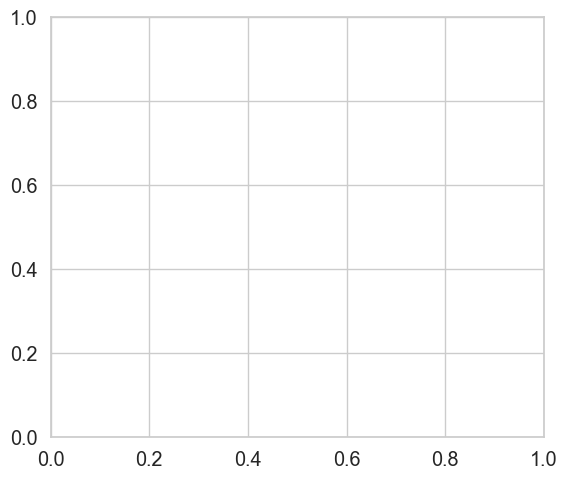

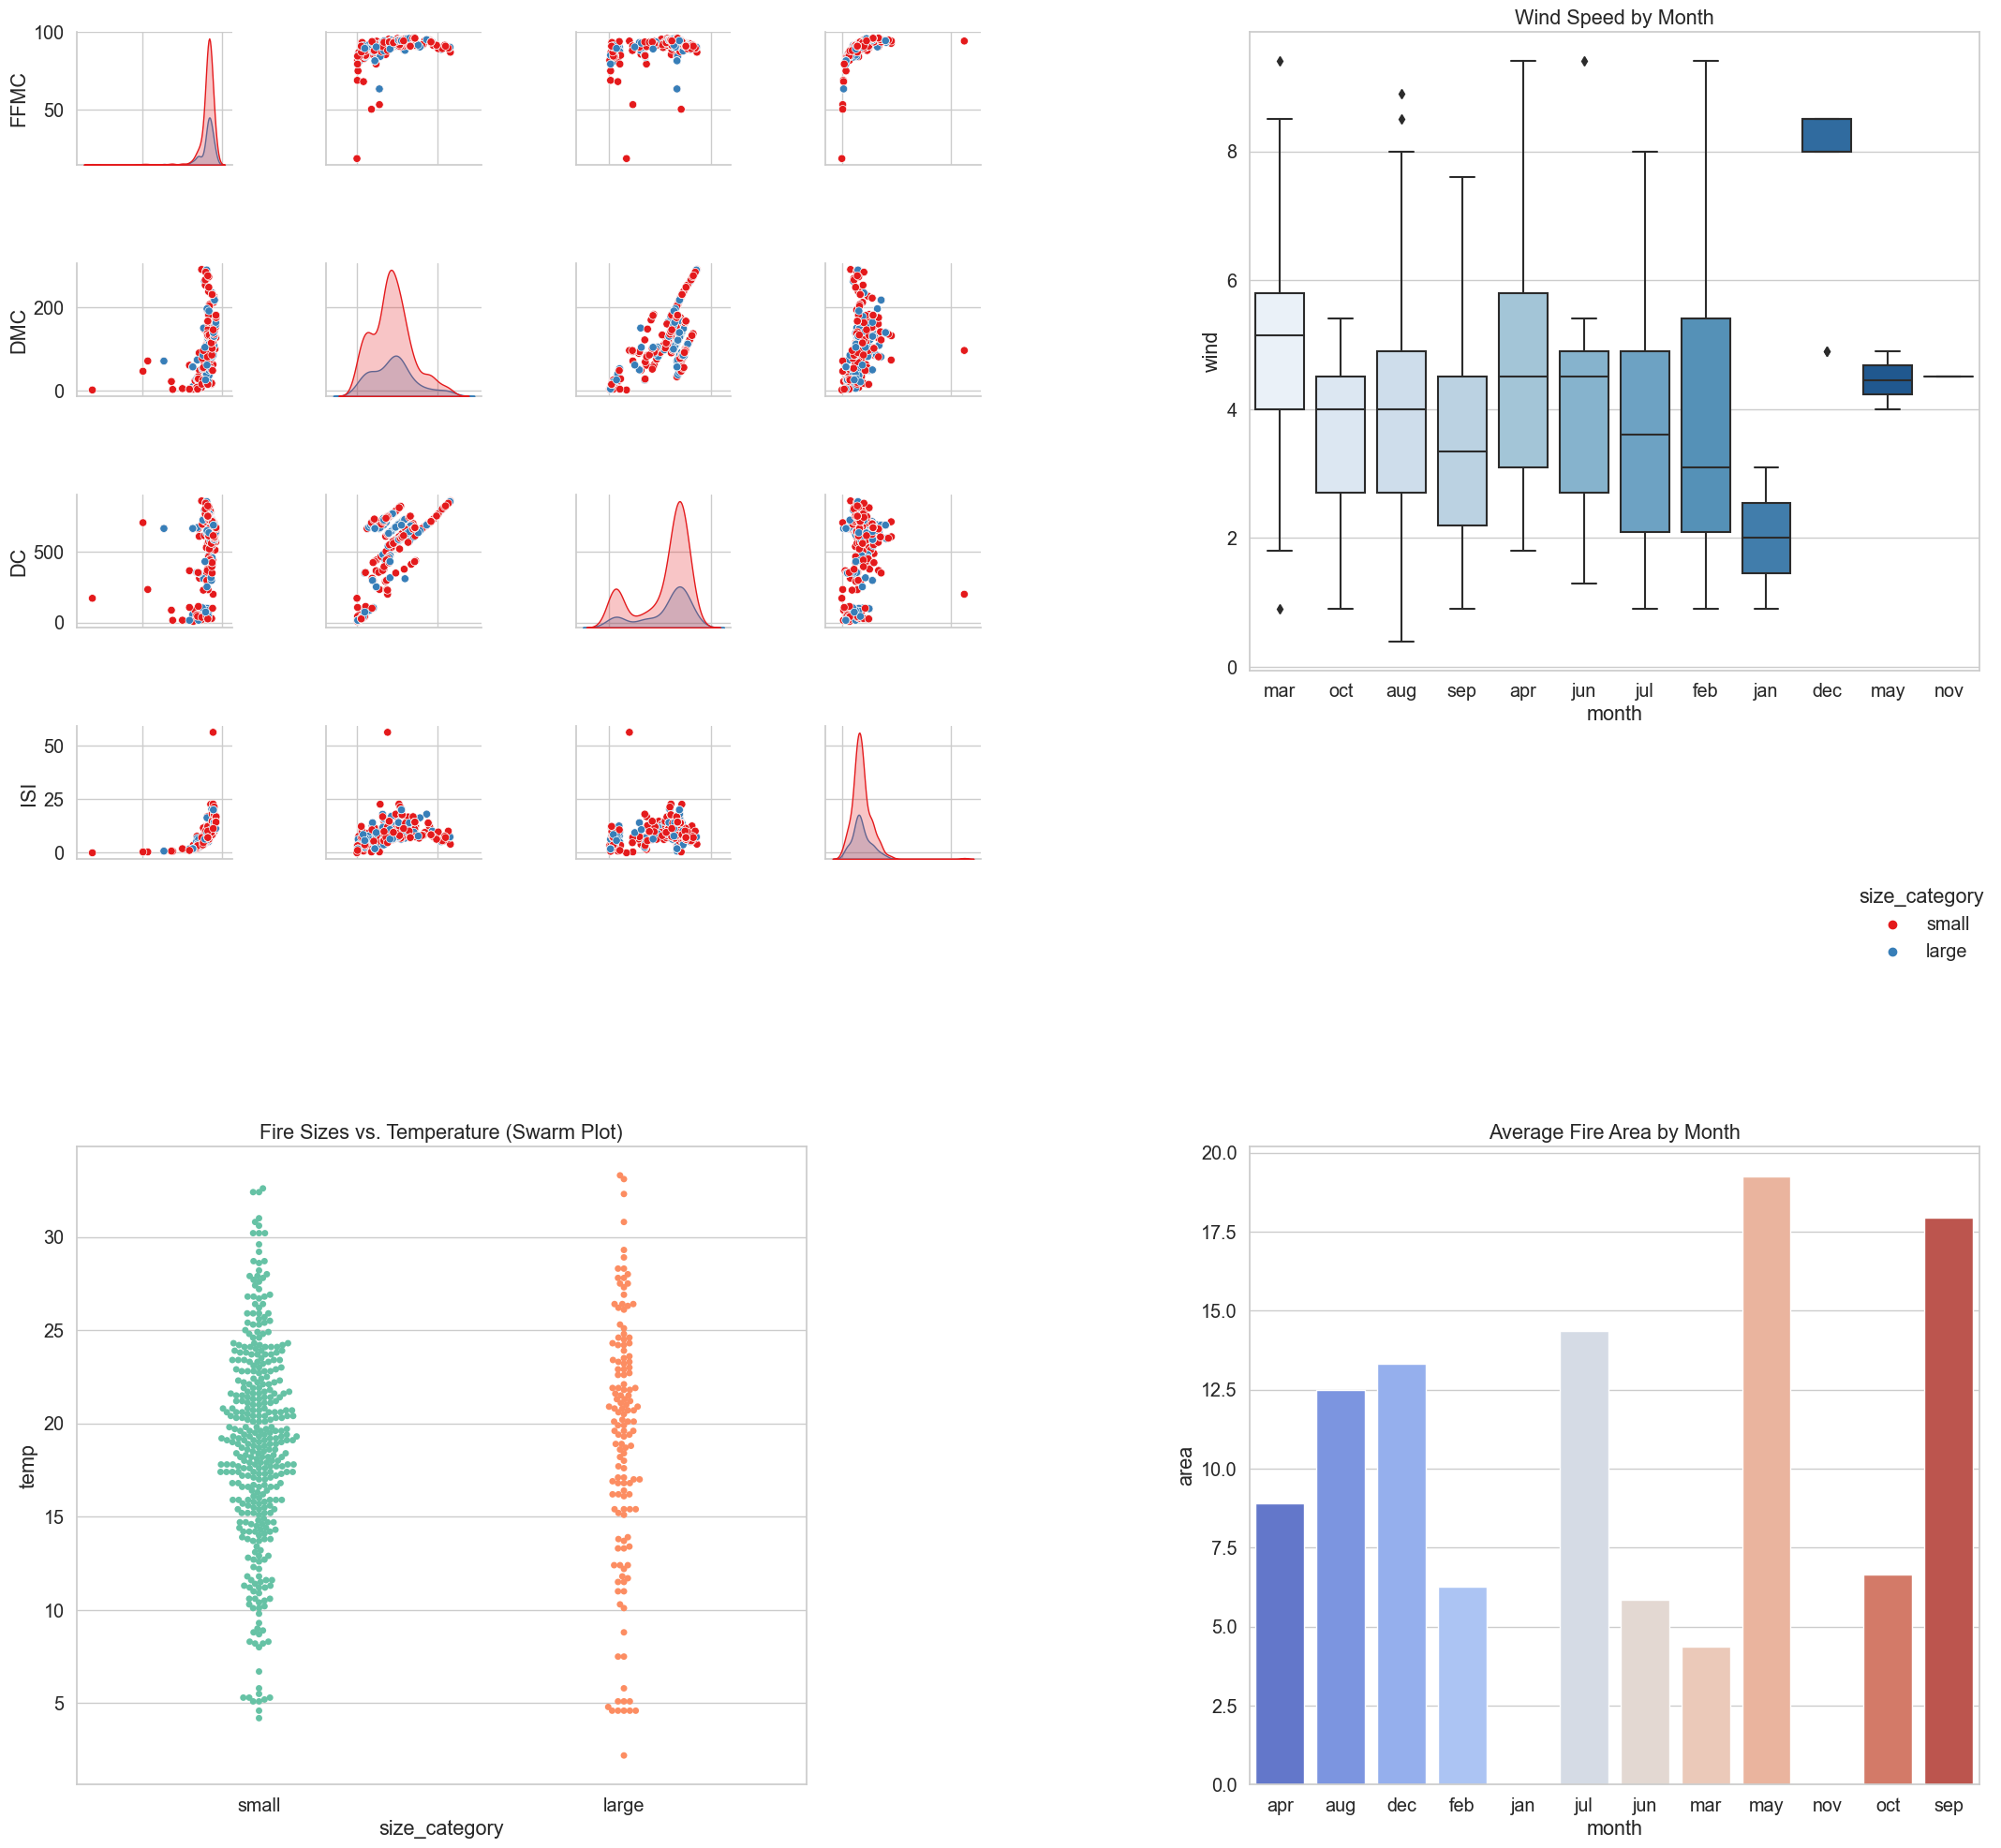

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set a larger figure size for better visualization
plt.figure(figsize=(14, 12))

# 1. Pairplot of Numerical Variables with Hue by Size Category
plt.subplot(2, 2, 1)
sns.pairplot(data=fire, hue='size_category', vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'], palette='Set1')
plt.title('Pairplot of Numerical Variables by Fire Size (Hue)')

# 2. Box Plot of Wind Speed by Month
plt.subplot(2, 2, 2)
sns.boxplot(data=fire, x='month', y='wind', palette='Blues')
plt.title('Wind Speed by Month')

# 3. Swarm Plot of Fire Sizes vs. Temperature
plt.subplot(2, 2, 3)
sns.swarmplot(data=fire, x='size_category', y='temp', palette='Set2')
plt.title('Fire Sizes vs. Temperature (Swarm Plot)')

# 4. Bar Plot of Average Fire Area by Month
plt.subplot(2, 2, 4)
average_area_by_month = fire.groupby('month')['area'].mean().reset_index()
sns.barplot(data=average_area_by_month, x='month', y='area', palette='coolwarm')
plt.title('Average Fire Area by Month')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

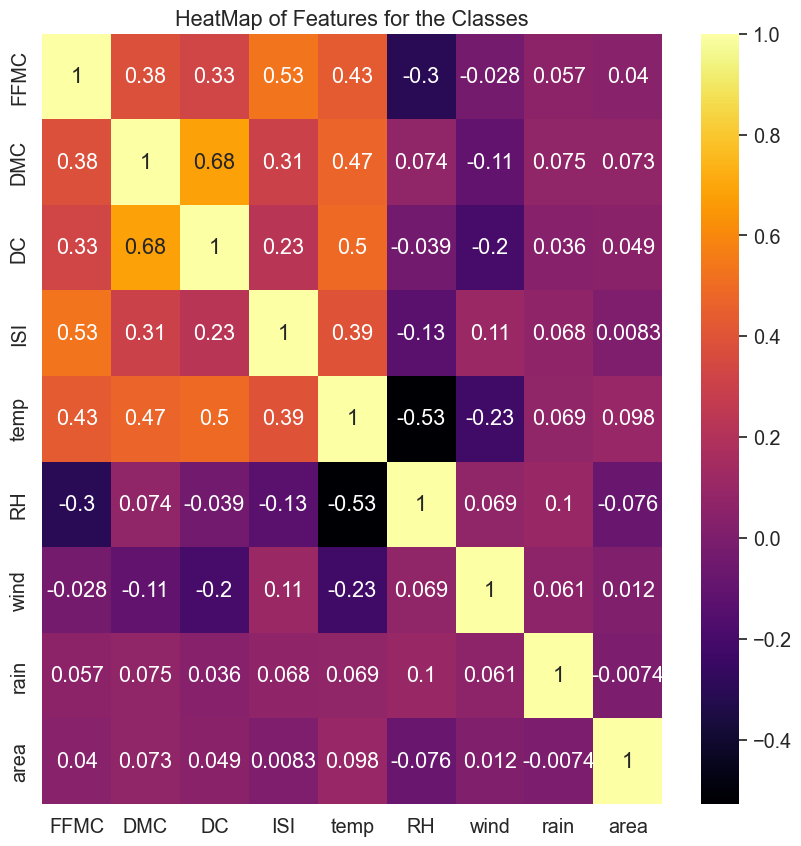

In [16]:
sns.heatmap(fire.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [17]:
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [18]:
# Encoding month and day features

fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
fire.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [19]:
# Encoding target variable 'size category'

fire.size_category.replace(('small', 'large'), (0, 1), inplace = True)
fire.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
65,8,4,91.7,114.3,661.3,6.3,18.6,44,4.5,0.0,0.00,0
5,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,0
192,8,2,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,8.71,1
488,8,2,95.1,141.3,605.8,17.7,19.4,71,7.6,0.0,46.70,1
370,9,7,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,11.06,1


In [20]:
fire.corr()['size_category'].sort_values(ascending=False)

size_category    1.000000
area             0.311322
month            0.080316
wind             0.059113
rain             0.050001
DMC              0.034715
FFMC             0.022063
DC               0.019428
day              0.016796
temp             0.006021
ISI             -0.008726
RH              -0.045243
Name: size_category, dtype: float64

In [21]:
# Standardizing data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaler.fit(fire.drop('size_category',axis=1))

StandardScaler()

In [23]:
scaled_features=scaler.transform(fire.drop('size_category',axis=1))
data_head=pd.DataFrame(scaled_features,columns=fire.columns[:-1])
data_head

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [24]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_head,fire['size_category'], test_size=0.3, random_state=42)

In [25]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 11)
Shape of x_test:  (156, 11)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


In [26]:
#Artificial Neural Network Model - Backpropagation

!pip install scikit-learn
!pip install tensorflow  


In [27]:
pip install keras

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [30]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=10)

Epoch 1/100
37/37 [==============================] - 2s 4ms/step - loss: 0.6884 - accuracy: 0.7202
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.6737 - accuracy: 0.7285
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.7285
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 0.5978 - accuracy: 0.7285
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5646 - accuracy: 0.7285
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.7285
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7285
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7285
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7285
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.7285
Epoch 11/

In [32]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 6ms/step - loss: 0.0659 - accuracy: 0.9615
accuracy: 96.15%


In [33]:
#Artificial Neural Network Model - Tuning of Hyperparameters batch size and epochs

In [36]:
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

In [37]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error


In [41]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=adam_v2.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [43]:
def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


In [44]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)


In [48]:
""""# Initialize KerasRegressor
keras_estimator = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, verbose=0)

# Create GridSearchCV
grid = GridSearchCV(estimator=keras_estimator, param_grid=param_grid, cv=KFold(), scoring=mae_scorer, verbose=10)
grid_result = grid.fit(x_train, y_train)

# Print best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Mean Absolute Error: ", -grid_result.best_score_)""''

SyntaxError: EOF while scanning triple-quoted string literal (2889059285.py, line 10)

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Define a custom Keras model function
def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define mean absolute error as a custom scoring function
def custom_scorer(model, X, y):
    y_pred = model.predict(X)
    return -mean_absolute_error(y, y_pred)

# Define hyperparameters to search
batch_sizes = [10, 20, 40]
num_epochs = [10, 50, 100]
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.1, 0.2]

best_score = float('inf')
best_params = {}

# Iterate through hyperparameters
for batch_size in batch_sizes:
    for epochs in num_epochs:
        for optimizer in optimizers:
            for dropout_rate in dropout_rates:
                # Create and compile the model
                model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)

                # Train the model
                model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Calculate custom score
                score = custom_scorer(model, x_train, y_train)

                # Check if this combination is better
                if score < best_score:
                    best_score = score
                    best_params = {
                        'batch_size': batch_size,
                        'epochs': epochs,
                        'optimizer': optimizer,
                        'dropout_rate': dropout_rate
                    }

# Print best parameters and score
print("Best Parameters: ", best_params)
print("Best Mean Absolute Error: ", -best_score)


12/12 [==============================] - 0s 4ms/step
Best Parameters:  {'batch_size': 40, 'epochs': 10, 'optimizer': 'adam', 'dropout_rate': 0.1}
Best Mean Absolute Error:  0.3265729788381225


In [49]:
#Artificial Neural Network Model - Tuning of All Hyperparameters

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

# Define a custom Keras model function for regression
def create_model(neuron1=4, neuron2=2, learning_rate=0.001, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define a custom scikit-learn wrapper for your Keras model
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, neuron1=4, neuron2=2, learning_rate=0.001, dropout_rate=0.0):
        self.neuron1 = neuron1
        self.neuron2 = neuron2
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.model = None

    def fit(self, X, y, **fit_params):
        X, y = check_X_y(X, y)
        self.model = create_model(neuron1=self.neuron1, neuron2=self.neuron2,
                                  learning_rate=self.learning_rate, dropout_rate=self.dropout_rate)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self.model.predict(X)

# Define mean absolute error as a custom scoring function for GridSearchCV
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the parameter grid for regression
param_grid = {
    'neuron1': [4, 8, 16],
    'neuron2': [2, 4, 8],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.1, 0.2],
}

# Create the KerasRegressorWrapper with your custom model function
estimator = KerasRegressorWrapper()

# Initialize GridSearchCV with the estimator
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                    scoring=mae_scorer, verbose=10)

# Fit the GridSearchCV with the data
grid.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid.best_params_
best_score = -grid.best_score_  # Since the scorer is greater_is_better=False

# Print best parameters and score
print("Best Parameters: ", best_params)
print("Best Mean Absolute Error: ", best_score)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2
9/9 [==============================] - 1s 4ms/step - loss: 1.5512
[CV 1/5; 1/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.2s
[CV 2/5; 1/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4354
[CV 2/5; 1/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.6s
[CV 3/5; 1/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.3314
[CV 3/5; 1/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.3s
[CV 4/5; 1/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2718
[CV 4/5; 1/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.3s
[CV 5/5; 1/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.2623
[CV 5/5; 1/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.6s
[CV 1/5; 2/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.5336
[CV 1/5; 2/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.6s
[CV 2/5; 2/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4895
[CV 2/5; 2/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.4s
[CV 3/5; 2/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.7736
[CV 3/5; 2/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 4/5; 2/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 3ms/step - loss: 0.2804
[CV 4/5; 2/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   2.2s
[CV 5/5; 2/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.6540
[CV 5/5; 2/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 1/5; 3/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 5ms/step - loss: 0.9298
[CV 1/5; 3/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.0s
[CV 2/5; 3/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 8ms/step - loss: 0.4107
[CV 2/5; 3/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.2s
[CV 3/5; 3/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.9744
[CV 3/5; 3/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.2s
[CV 4/5; 3/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4258
[CV 4/5; 3/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.2s
[CV 5/5; 3/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.3516
[CV 5/5; 3/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.3s
[CV 1/5; 4/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 3.7453
[CV 1/5; 4/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.6s
[CV 2/5; 4/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.3039
[CV 2/5; 4/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.6s
[CV 3/5; 4/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.7386
[CV 3/5; 4/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.3s
[CV 4/5; 4/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.2651
[CV 4/5; 4/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 5/5; 4/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.7179
[CV 5/5; 4/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.3s
[CV 1/5; 5/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.9929
[CV 1/5; 5/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.3s
[CV 2/5; 5/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.4245
[CV 2/5; 5/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 3/5; 5/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 1.6571
[CV 3/5; 5/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.4s
[CV 4/5; 5/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4667
[CV 4/5; 5/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.5s
[CV 5/5; 5/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 6ms/step - loss: 0.5237
[CV 5/5; 5/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 1/5; 6/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 1.0401
[CV 1/5; 6/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.5s
[CV 2/5; 6/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.5097
[CV 2/5; 6/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   2.5s
[CV 3/5; 6/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3982
[CV 3/5; 6/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.8s
[CV 4/5; 6/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4183
[CV 4/5; 6/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.4s
[CV 5/5; 6/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4391
[CV 5/5; 6/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.2s
[CV 1/5; 7/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.2600
[CV 1/5; 7/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.3s
[CV 2/5; 7/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.2777
[CV 2/5; 7/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.5s
[CV 3/5; 7/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.3508
[CV 3/5; 7/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.2s
[CV 4/5; 7/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3347
[CV 4/5; 7/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.2s
[CV 5/5; 7/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2901
[CV 5/5; 7/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.4s
[CV 1/5; 8/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.9233
[CV 1/5; 8/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.5s
[CV 2/5; 8/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.4356
[CV 2/5; 8/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.9s
[CV 3/5; 8/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3814
[CV 3/5; 8/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   2.0s
[CV 4/5; 8/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.6881
[CV 4/5; 8/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.6s
[CV 5/5; 8/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2496
[CV 5/5; 8/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.5s
[CV 1/5; 9/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.4483
[CV 1/5; 9/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.3s
[CV 2/5; 9/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3680
[CV 2/5; 9/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 3/5; 9/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.7428
[CV 3/5; 9/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 4/5; 9/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2709
[CV 4/5; 9/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 5/5; 9/81] START dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5061
[CV 5/5; 9/81] END dropout_rate=0.0, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   2.4s
[CV 1/5; 10/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 4ms/step - loss: 0.4788
[CV 1/5; 10/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.8s
[CV 2/5; 10/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 1.1717
[CV 2/5; 10/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   2.3s
[CV 3/5; 10/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2421
[CV 3/5; 10/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.4s
[CV 4/5; 10/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3388
[CV 4/5; 10/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.5s
[CV 5/5; 10/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2397
[CV 5/5; 10/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.5s
[CV 1/5; 11/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 1.1095
[CV 1/5; 11/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.3s
[CV 2/5; 11/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.3702
[CV 2/5; 11/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.5s
[CV 3/5; 11/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4872
[CV 3/5; 11/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.6s
[CV 4/5; 11/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 1.0510
[CV 4/5; 11/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.5s
[CV 5/5; 11/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2755
[CV 5/5; 11/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.9s
[CV 1/5; 12/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 4ms/step - loss: 0.2502
[CV 1/5; 12/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.9s
[CV 2/5; 12/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3360
[CV 2/5; 12/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.8s
[CV 3/5; 12/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.7312
[CV 3/5; 12/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.5s
[CV 4/5; 12/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2605
[CV 4/5; 12/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.5s
[CV 5/5; 12/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3233
[CV 5/5; 12/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.5s
[CV 1/5; 13/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 1.2844
[CV 1/5; 13/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.4s
[CV 2/5; 13/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3692
[CV 2/5; 13/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.3s
[CV 3/5; 13/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 3ms/step - loss: 0.2605
[CV 3/5; 13/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.8s
[CV 4/5; 13/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.2653
[CV 4/5; 13/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.5s
[CV 5/5; 13/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.9101
[CV 5/5; 13/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.8s
[CV 1/5; 14/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 8ms/step - loss: 0.9629
[CV 1/5; 14/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.8s
[CV 2/5; 14/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 2ms/step - loss: 0.6916
[CV 2/5; 14/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.8s
[CV 3/5; 14/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3765
[CV 3/5; 14/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.3s
[CV 4/5; 14/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2786
[CV 4/5; 14/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.5s
[CV 5/5; 14/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3575
[CV 5/5; 14/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 1/5; 15/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.5326
[CV 1/5; 15/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.4s
[CV 2/5; 15/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2709
[CV 2/5; 15/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.4s
[CV 3/5; 15/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2951
[CV 3/5; 15/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.1s
[CV 4/5; 15/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.2464
[CV 4/5; 15/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.5s
[CV 5/5; 15/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.7558
[CV 5/5; 15/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.7s
[CV 1/5; 16/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 6ms/step - loss: 0.4504
[CV 1/5; 16/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.8s
[CV 2/5; 16/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 6ms/step - loss: 0.3053
[CV 2/5; 16/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.6s
[CV 3/5; 16/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2917
[CV 3/5; 16/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 4/5; 16/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2471
[CV 4/5; 16/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.4s
[CV 5/5; 16/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3488
[CV 5/5; 16/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.6s
[CV 1/5; 17/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 1.9830
[CV 1/5; 17/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.3s
[CV 2/5; 17/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 3ms/step - loss: 0.4280
[CV 2/5; 17/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   2.6s
[CV 3/5; 17/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2428
[CV 3/5; 17/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.8s
[CV 4/5; 17/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.2422
[CV 4/5; 17/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.8s
[CV 5/5; 17/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 6ms/step - loss: 0.5342
[CV 5/5; 17/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   2.0s
[CV 1/5; 18/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.2741
[CV 1/5; 18/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 2/5; 18/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3275
[CV 2/5; 18/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 3/5; 18/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.9173
[CV 3/5; 18/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 4/5; 18/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 6ms/step - loss: 0.3607
[CV 4/5; 18/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 5/5; 18/81] START dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.4113
[CV 5/5; 18/81] END dropout_rate=0.0, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.3s
[CV 1/5; 19/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.3931
[CV 1/5; 19/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.0s
[CV 2/5; 19/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2444
[CV 2/5; 19/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.2s
[CV 3/5; 19/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3259
[CV 3/5; 19/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.4s
[CV 4/5; 19/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4018
[CV 4/5; 19/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.6s
[CV 5/5; 19/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.3284
[CV 5/5; 19/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.7s
[CV 1/5; 20/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.2356
[CV 1/5; 20/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.6s
[CV 2/5; 20/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2233
[CV 2/5; 20/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.5s
[CV 3/5; 20/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2405
[CV 3/5; 20/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.4s
[CV 4/5; 20/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3025
[CV 4/5; 20/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.3s
[CV 5/5; 20/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2467
[CV 5/5; 20/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.9s
[CV 1/5; 21/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.2995
[CV 1/5; 21/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   0.9s
[CV 2/5; 21/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2216
[CV 2/5; 21/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.0s
[CV 3/5; 21/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3587
[CV 3/5; 21/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.0s
[CV 4/5; 21/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2914
[CV 4/5; 21/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.1s
[CV 5/5; 21/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.4678
[CV 5/5; 21/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.3s
[CV 1/5; 22/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.2467
[CV 1/5; 22/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.3s
[CV 2/5; 22/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3319
[CV 2/5; 22/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.3s
[CV 3/5; 22/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2344
[CV 3/5; 22/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.0s
[CV 4/5; 22/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2940
[CV 4/5; 22/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.0s
[CV 5/5; 22/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2988
[CV 5/5; 22/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.0s
[CV 1/5; 23/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.3582
[CV 1/5; 23/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.0s
[CV 2/5; 23/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5504
[CV 2/5; 23/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.0s
[CV 3/5; 23/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.5029
[CV 3/5; 23/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.0s
[CV 4/5; 23/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3584
[CV 4/5; 23/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.0s
[CV 5/5; 23/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2944
[CV 5/5; 23/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.3s
[CV 1/5; 24/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.3054
[CV 1/5; 24/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.4s
[CV 2/5; 24/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2935
[CV 2/5; 24/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   2.2s
[CV 3/5; 24/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3197
[CV 3/5; 24/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.7s
[CV 4/5; 24/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 3s 4ms/step - loss: 0.2587
[CV 4/5; 24/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   3.0s
[CV 5/5; 24/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.6372
[CV 5/5; 24/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.8s
[CV 1/5; 25/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 0.3009
[CV 1/5; 25/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.0s
[CV 2/5; 25/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.3041
[CV 2/5; 25/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.3s
[CV 3/5; 25/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.4638
[CV 3/5; 25/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.6s
[CV 4/5; 25/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2018
[CV 4/5; 25/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.4s
[CV 5/5; 25/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.2934
[CV 5/5; 25/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.5s
[CV 1/5; 26/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 4ms/step - loss: 0.2561
[CV 1/5; 26/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.9s
[CV 2/5; 26/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.3672
[CV 2/5; 26/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.8s
[CV 3/5; 26/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.5039
[CV 3/5; 26/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   2.0s
[CV 4/5; 26/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5034
[CV 4/5; 26/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.3s
[CV 5/5; 26/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2404
[CV 5/5; 26/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.6s
[CV 1/5; 27/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 6ms/step - loss: 0.5271
[CV 1/5; 27/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.3s
[CV 2/5; 27/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.6726
[CV 2/5; 27/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.6s
[CV 3/5; 27/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3172
[CV 3/5; 27/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.4s
[CV 4/5; 27/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2412
[CV 4/5; 27/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.4s
[CV 5/5; 27/81] START dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.0871
[CV 5/5; 27/81] END dropout_rate=0.0, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.3s
[CV 1/5; 28/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 3ms/step - loss: 0.3174
[CV 1/5; 28/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.7s
[CV 2/5; 28/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 3s 6ms/step - loss: 4.3996
[CV 2/5; 28/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   2.7s
[CV 3/5; 28/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.5876
[CV 3/5; 28/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.3s
[CV 4/5; 28/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.5058
[CV 4/5; 28/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.4s
[CV 5/5; 28/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.7352
[CV 5/5; 28/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.3s
[CV 1/5; 29/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.3248
[CV 1/5; 29/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 2/5; 29/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 1.1448
[CV 2/5; 29/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.3s
[CV 3/5; 29/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 2.4991
[CV 3/5; 29/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.6s
[CV 4/5; 29/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.1170
[CV 4/5; 29/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.4s
[CV 5/5; 29/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5135
[CV 5/5; 29/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.6s
[CV 1/5; 30/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.2839
[CV 1/5; 30/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.4s
[CV 2/5; 30/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.6789
[CV 2/5; 30/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.6s
[CV 3/5; 30/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.2438
[CV 3/5; 30/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.5s
[CV 4/5; 30/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.9573
[CV 4/5; 30/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.2s
[CV 5/5; 30/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.6103
[CV 5/5; 30/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.1s
[CV 1/5; 31/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.9167
[CV 1/5; 31/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.2s
[CV 2/5; 31/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.3564
[CV 2/5; 31/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.4s
[CV 3/5; 31/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3527
[CV 3/5; 31/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   2.0s
[CV 4/5; 31/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.7583
[CV 4/5; 31/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.5s
[CV 5/5; 31/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3761
[CV 5/5; 31/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   2.0s
[CV 1/5; 32/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.6127
[CV 1/5; 32/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.6s
[CV 2/5; 32/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.7359
[CV 2/5; 32/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   2.1s
[CV 3/5; 32/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2897
[CV 3/5; 32/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.4s
[CV 4/5; 32/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.8222
[CV 4/5; 32/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.3s
[CV 5/5; 32/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.6478
[CV 5/5; 32/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 1/5; 33/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 1.2792
[CV 1/5; 33/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.2s
[CV 2/5; 33/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 6ms/step - loss: 0.4085
[CV 2/5; 33/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.3s
[CV 3/5; 33/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.6245
[CV 3/5; 33/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.3s
[CV 4/5; 33/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4393
[CV 4/5; 33/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.5s
[CV 5/5; 33/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.4502
[CV 5/5; 33/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.9s
[CV 1/5; 34/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.9990
[CV 1/5; 34/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.5s
[CV 2/5; 34/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 1.6362
[CV 2/5; 34/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.7s
[CV 3/5; 34/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.7881
[CV 3/5; 34/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.3s
[CV 4/5; 34/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2890
[CV 4/5; 34/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.5s
[CV 5/5; 34/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3902
[CV 5/5; 34/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.3s
[CV 1/5; 35/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 5ms/step - loss: 0.2978
[CV 1/5; 35/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.1s
[CV 2/5; 35/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.5062
[CV 2/5; 35/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.4s
[CV 3/5; 35/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2539
[CV 3/5; 35/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.9s
[CV 4/5; 35/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.8425
[CV 4/5; 35/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.7s
[CV 5/5; 35/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.6814
[CV 5/5; 35/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.3s
[CV 1/5; 36/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 6ms/step - loss: 0.3830
[CV 1/5; 36/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.8s
[CV 2/5; 36/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 6ms/step - loss: 1.1508
[CV 2/5; 36/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   2.2s
[CV 3/5; 36/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.2016
[CV 3/5; 36/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   2.1s
[CV 4/5; 36/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.5393
[CV 4/5; 36/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.8s
[CV 5/5; 36/81] START dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 6ms/step - loss: 1.1394
[CV 5/5; 36/81] END dropout_rate=0.1, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 1/5; 37/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 5ms/step - loss: 0.2676
[CV 1/5; 37/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.6s
[CV 2/5; 37/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2885
[CV 2/5; 37/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.8s
[CV 3/5; 37/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.4992
[CV 3/5; 37/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.7s
[CV 4/5; 37/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2511
[CV 4/5; 37/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.8s
[CV 5/5; 37/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 3ms/step - loss: 0.6787
[CV 5/5; 37/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.9s
[CV 1/5; 38/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 4ms/step - loss: 0.5380
[CV 1/5; 38/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   2.1s
[CV 2/5; 38/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.2818
[CV 2/5; 38/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.7s
[CV 3/5; 38/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.2714
[CV 3/5; 38/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.4s
[CV 4/5; 38/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2572
[CV 4/5; 38/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 5/5; 38/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2225
[CV 5/5; 38/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.3s
[CV 1/5; 39/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.3373
[CV 1/5; 39/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.6s
[CV 2/5; 39/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 1.1702
[CV 2/5; 39/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   2.1s
[CV 3/5; 39/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 6ms/step - loss: 0.6919
[CV 3/5; 39/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.6s
[CV 4/5; 39/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 3ms/step - loss: 0.9121
[CV 4/5; 39/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   2.1s
[CV 5/5; 39/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3248
[CV 5/5; 39/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.7s
[CV 1/5; 40/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.6275
[CV 1/5; 40/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.2s
[CV 2/5; 40/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.7360
[CV 2/5; 40/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.5s
[CV 3/5; 40/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 9ms/step - loss: 0.7748
[CV 3/5; 40/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.5s
[CV 4/5; 40/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.3993
[CV 4/5; 40/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   2.1s
[CV 5/5; 40/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2535
[CV 5/5; 40/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.7s
[CV 1/5; 41/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.2871
[CV 1/5; 41/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.4s
[CV 2/5; 41/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 8ms/step - loss: 0.4885
[CV 2/5; 41/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.8s
[CV 3/5; 41/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.7746
[CV 3/5; 41/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.8s
[CV 4/5; 41/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 3ms/step - loss: 0.2358
[CV 4/5; 41/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.7s
[CV 5/5; 41/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4725
[CV 5/5; 41/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.3s
[CV 1/5; 42/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.2804
[CV 1/5; 42/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.2s
[CV 2/5; 42/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3395
[CV 2/5; 42/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.3s
[CV 3/5; 42/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 6ms/step - loss: 0.3369
[CV 3/5; 42/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.6s
[CV 4/5; 42/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.2919
[CV 4/5; 42/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   2.2s
[CV 5/5; 42/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5048
[CV 5/5; 42/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   2.5s
[CV 1/5; 43/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 3.7038
[CV 1/5; 43/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.2s
[CV 2/5; 43/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.6900
[CV 2/5; 43/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.5s
[CV 3/5; 43/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2539
[CV 3/5; 43/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.5s
[CV 4/5; 43/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2712
[CV 4/5; 43/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.3s
[CV 5/5; 43/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2157
[CV 5/5; 43/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 1/5; 44/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 5ms/step - loss: 0.4567
[CV 1/5; 44/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.7s
[CV 2/5; 44/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3380
[CV 2/5; 44/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.8s
[CV 3/5; 44/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3157
[CV 3/5; 44/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.4s
[CV 4/5; 44/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3101
[CV 4/5; 44/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.2s
[CV 5/5; 44/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3007
[CV 5/5; 44/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.4s
[CV 1/5; 45/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 4ms/step - loss: 0.2543
[CV 1/5; 45/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.7s
[CV 2/5; 45/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 6ms/step - loss: 0.7017
[CV 2/5; 45/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   2.5s
[CV 3/5; 45/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2810
[CV 3/5; 45/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.7s
[CV 4/5; 45/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3226
[CV 4/5; 45/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.3s
[CV 5/5; 45/81] START dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.5340
[CV 5/5; 45/81] END dropout_rate=0.1, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.1s
[CV 1/5; 46/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.3281
[CV 1/5; 46/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.0s
[CV 2/5; 46/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2486
[CV 2/5; 46/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.1s
[CV 3/5; 46/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2785
[CV 3/5; 46/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.9s
[CV 4/5; 46/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.3631
[CV 4/5; 46/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.2s
[CV 5/5; 46/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5081
[CV 5/5; 46/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.1s
[CV 1/5; 47/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.4325
[CV 1/5; 47/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.0s
[CV 2/5; 47/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.5690
[CV 2/5; 47/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 3/5; 47/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2538
[CV 3/5; 47/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.5s
[CV 4/5; 47/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4125
[CV 4/5; 47/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.4s
[CV 5/5; 47/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 6ms/step - loss: 0.2651
[CV 5/5; 47/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.4s
[CV 1/5; 48/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.3227
[CV 1/5; 48/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.2s
[CV 2/5; 48/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.4632
[CV 2/5; 48/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.1s
[CV 3/5; 48/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.5968
[CV 3/5; 48/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.4s
[CV 4/5; 48/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4779
[CV 4/5; 48/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.2s
[CV 5/5; 48/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2404
[CV 5/5; 48/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.2s
[CV 1/5; 49/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 3ms/step - loss: 0.2431
[CV 1/5; 49/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   2.4s
[CV 2/5; 49/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2253
[CV 2/5; 49/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.6s
[CV 3/5; 49/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2072
[CV 3/5; 49/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.6s
[CV 4/5; 49/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.2200
[CV 4/5; 49/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.9s
[CV 5/5; 49/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.2203
[CV 5/5; 49/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   2.6s
[CV 1/5; 50/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.4130
[CV 1/5; 50/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 2/5; 50/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4195
[CV 2/5; 50/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.1s
[CV 3/5; 50/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2559
[CV 3/5; 50/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.1s
[CV 4/5; 50/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2692
[CV 4/5; 50/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 5/5; 50/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.4032
[CV 5/5; 50/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   2.1s
[CV 1/5; 51/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.4282
[CV 1/5; 51/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.7s
[CV 2/5; 51/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.4459
[CV 2/5; 51/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.8s
[CV 3/5; 51/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.4172
[CV 3/5; 51/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   2.7s
[CV 4/5; 51/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2646
[CV 4/5; 51/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   2.0s
[CV 5/5; 51/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4598
[CV 5/5; 51/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.3s
[CV 1/5; 52/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.2732
[CV 1/5; 52/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.6s
[CV 2/5; 52/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.2370
[CV 2/5; 52/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   2.0s
[CV 3/5; 52/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 6ms/step - loss: 0.2085
[CV 3/5; 52/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.6s
[CV 4/5; 52/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.3902
[CV 4/5; 52/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.5s
[CV 5/5; 52/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5084
[CV 5/5; 52/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.5s
[CV 1/5; 53/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 2s 5ms/step - loss: 0.3559
[CV 1/5; 53/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   2.0s
[CV 2/5; 53/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.3630
[CV 2/5; 53/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   2.6s
[CV 3/5; 53/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 3s 4ms/step - loss: 0.4435
[CV 3/5; 53/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   2.9s
[CV 4/5; 53/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2857
[CV 4/5; 53/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.4s
[CV 5/5; 53/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3309
[CV 5/5; 53/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.5s
[CV 1/5; 54/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.4873
[CV 1/5; 54/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.5s
[CV 2/5; 54/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.6826
[CV 2/5; 54/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.2s
[CV 3/5; 54/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3343
[CV 3/5; 54/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.3s
[CV 4/5; 54/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.5368
[CV 4/5; 54/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.6s
[CV 5/5; 54/81] START dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2953
[CV 5/5; 54/81] END dropout_rate=0.1, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.6s
[CV 1/5; 55/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.2515
[CV 1/5; 55/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.4s
[CV 2/5; 55/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5011
[CV 2/5; 55/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.4s
[CV 3/5; 55/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.0377
[CV 3/5; 55/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.2s
[CV 4/5; 55/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 2.2566
[CV 4/5; 55/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.3s
[CV 5/5; 55/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 1.9153
[CV 5/5; 55/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   1.2s
[CV 1/5; 56/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 1.0675
[CV 1/5; 56/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.0s
[CV 2/5; 56/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.1182
[CV 2/5; 56/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.2s
[CV 3/5; 56/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3849
[CV 3/5; 56/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 4/5; 56/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.1656
[CV 4/5; 56/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 5/5; 56/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.7032
[CV 5/5; 56/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 1/5; 57/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 1.8242
[CV 1/5; 57/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.1s
[CV 2/5; 57/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.5281
[CV 2/5; 57/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   2.3s
[CV 3/5; 57/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3487
[CV 3/5; 57/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.5s
[CV 4/5; 57/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.6012
[CV 4/5; 57/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.1s
[CV 5/5; 57/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4817
[CV 5/5; 57/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=4, neuron2=8;, score=nan total time=   1.1s
[CV 1/5; 58/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 5.2038
[CV 1/5; 58/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   0.8s
[CV 2/5; 58/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4231
[CV 2/5; 58/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   0.8s
[CV 3/5; 58/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3337
[CV 3/5; 58/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 4/5; 58/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.8563
[CV 4/5; 58/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 5/5; 58/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 1.4112
[CV 5/5; 58/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 1/5; 59/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 1.3780
[CV 1/5; 59/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 2/5; 59/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.8923
[CV 2/5; 59/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 3/5; 59/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.6278
[CV 3/5; 59/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.1s
[CV 4/5; 59/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2804
[CV 4/5; 59/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.4s
[CV 5/5; 59/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.7244
[CV 5/5; 59/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   1.5s
[CV 1/5; 60/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 1.2037
[CV 1/5; 60/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.3s
[CV 2/5; 60/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.3687
[CV 2/5; 60/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.3s
[CV 3/5; 60/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 1.4893
[CV 3/5; 60/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.2s
[CV 4/5; 60/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 1.1051
[CV 4/5; 60/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.1s
[CV 5/5; 60/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3401
[CV 5/5; 60/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   1.9s
[CV 1/5; 61/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.2858
[CV 1/5; 61/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 2/5; 61/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3881
[CV 2/5; 61/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 3/5; 61/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.8214
[CV 3/5; 61/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.2s
[CV 4/5; 61/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.6401
[CV 4/5; 61/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 5/5; 61/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3694
[CV 5/5; 61/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=2;, score=nan total time=   1.3s
[CV 1/5; 62/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 1.6373
[CV 1/5; 62/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.3s
[CV 2/5; 62/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.6436
[CV 2/5; 62/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.5s
[CV 3/5; 62/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.2375
[CV 3/5; 62/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.2s
[CV 4/5; 62/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 1.3489
[CV 4/5; 62/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.1s
[CV 5/5; 62/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.5361
[CV 5/5; 62/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=4;, score=nan total time=   1.1s
[CV 1/5; 63/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 1.0461
[CV 1/5; 63/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.0s
[CV 2/5; 63/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.9022
[CV 2/5; 63/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.1s
[CV 3/5; 63/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.7241
[CV 3/5; 63/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.1s
[CV 4/5; 63/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.4342
[CV 4/5; 63/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.2s
[CV 5/5; 63/81] START dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 3.1725
[CV 5/5; 63/81] END dropout_rate=0.2, learning_rate=0.001, neuron1=16, neuron2=8;, score=nan total time=   1.3s
[CV 1/5; 64/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.3220
[CV 1/5; 64/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.0s
[CV 2/5; 64/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3938
[CV 2/5; 64/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.1s
[CV 3/5; 64/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5539
[CV 3/5; 64/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   2.3s
[CV 4/5; 64/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3043
[CV 4/5; 64/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.5s
[CV 5/5; 64/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 1.1854
[CV 5/5; 64/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   1.1s
[CV 1/5; 65/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.2460
[CV 1/5; 65/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 2/5; 65/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.3306
[CV 2/5; 65/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.2s
[CV 3/5; 65/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5106
[CV 3/5; 65/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.2s
[CV 4/5; 65/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.4238
[CV 4/5; 65/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 5/5; 65/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.3540
[CV 5/5; 65/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 1/5; 66/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 0.3363
[CV 1/5; 66/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.0s
[CV 2/5; 66/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3540
[CV 2/5; 66/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.1s
[CV 3/5; 66/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4532
[CV 3/5; 66/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.2s
[CV 4/5; 66/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5717
[CV 4/5; 66/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.3s
[CV 5/5; 66/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.7643
[CV 5/5; 66/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=4, neuron2=8;, score=nan total time=   1.5s
[CV 1/5; 67/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.7085
[CV 1/5; 67/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.5s
[CV 2/5; 67/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 4ms/step - loss: 0.5133
[CV 2/5; 67/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.7s
[CV 3/5; 67/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 6ms/step - loss: 0.2616
[CV 3/5; 67/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.9s
[CV 4/5; 67/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.2709
[CV 4/5; 67/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 5/5; 67/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 1.2466
[CV 5/5; 67/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 1/5; 68/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.3753
[CV 1/5; 68/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.8s
[CV 2/5; 68/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 1.2716
[CV 2/5; 68/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.1s
[CV 3/5; 68/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2378
[CV 3/5; 68/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.1s
[CV 4/5; 68/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.2243
[CV 4/5; 68/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.1s
[CV 5/5; 68/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.3832
[CV 5/5; 68/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   1.5s
[CV 1/5; 69/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.4587
[CV 1/5; 69/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.4s
[CV 2/5; 69/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2630
[CV 2/5; 69/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.5s
[CV 3/5; 69/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2865
[CV 3/5; 69/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.2s
[CV 4/5; 69/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2976
[CV 4/5; 69/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.1s
[CV 5/5; 69/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.7175
[CV 5/5; 69/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   1.1s
[CV 1/5; 70/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 0.2777
[CV 1/5; 70/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 2/5; 70/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3079
[CV 2/5; 70/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 3/5; 70/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4698
[CV 3/5; 70/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 4/5; 70/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3997
[CV 4/5; 70/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 5/5; 70/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 1.2941
[CV 5/5; 70/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 1/5; 71/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.4025
[CV 1/5; 71/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.0s
[CV 2/5; 71/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3693
[CV 2/5; 71/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.2s
[CV 3/5; 71/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3840
[CV 3/5; 71/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.5s
[CV 4/5; 71/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4030
[CV 4/5; 71/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   2.3s
[CV 5/5; 71/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.5370
[CV 5/5; 71/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=4;, score=nan total time=   1.1s
[CV 1/5; 72/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 0.4303
[CV 1/5; 72/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.0s
[CV 2/5; 72/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.5390
[CV 2/5; 72/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.1s
[CV 3/5; 72/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2869
[CV 3/5; 72/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.2s
[CV 4/5; 72/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3398
[CV 4/5; 72/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.4s
[CV 5/5; 72/81] START dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 7ms/step - loss: 0.4469
[CV 5/5; 72/81] END dropout_rate=0.2, learning_rate=0.01, neuron1=16, neuron2=8;, score=nan total time=   1.8s
[CV 1/5; 73/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.5987
[CV 1/5; 73/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.4s
[CV 2/5; 73/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3148
[CV 2/5; 73/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.5s
[CV 3/5; 73/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 5ms/step - loss: 0.3345
[CV 3/5; 73/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.8s
[CV 4/5; 73/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 6ms/step - loss: 0.2510
[CV 4/5; 73/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   2.3s
[CV 5/5; 73/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4550
[CV 5/5; 73/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   1.8s
[CV 1/5; 74/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.4150
[CV 1/5; 74/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.5s
[CV 2/5; 74/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 2s 3ms/step - loss: 0.7390
[CV 2/5; 74/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.6s
[CV 3/5; 74/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.5465
[CV 3/5; 74/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.2s
[CV 4/5; 74/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2625
[CV 4/5; 74/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 5/5; 74/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2672
[CV 5/5; 74/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   1.1s
[CV 1/5; 75/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.2174
[CV 1/5; 75/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.0s
[CV 2/5; 75/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3184
[CV 2/5; 75/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.9s
[CV 3/5; 75/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3385
[CV 3/5; 75/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.4s
[CV 4/5; 75/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.9568
[CV 4/5; 75/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.5s
[CV 5/5; 75/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.7024
[CV 5/5; 75/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=4, neuron2=8;, score=nan total time=   1.5s
[CV 1/5; 76/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.3456
[CV 1/5; 76/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 2/5; 76/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2484
[CV 2/5; 76/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 3/5; 76/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2732
[CV 3/5; 76/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 4/5; 76/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2624
[CV 4/5; 76/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 5/5; 76/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 2.4896
[CV 5/5; 76/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   1.1s
[CV 1/5; 77/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.4140
[CV 1/5; 77/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.0s
[CV 2/5; 77/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.3252
[CV 2/5; 77/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.2s
[CV 3/5; 77/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2858
[CV 3/5; 77/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.1s
[CV 4/5; 77/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3005
[CV 4/5; 77/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.1s
[CV 5/5; 77/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2594
[CV 5/5; 77/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   1.5s
[CV 1/5; 78/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 4ms/step - loss: 0.4121
[CV 1/5; 78/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.4s
[CV 2/5; 78/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3308
[CV 2/5; 78/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.3s
[CV 3/5; 78/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.3257
[CV 3/5; 78/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.1s
[CV 4/5; 78/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3215
[CV 4/5; 78/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.3s
[CV 5/5; 78/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3212
[CV 5/5; 78/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=8, neuron2=8;, score=nan total time=   1.9s
[CV 1/5; 79/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 0.2403
[CV 1/5; 79/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 2/5; 79/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.2068
[CV 2/5; 79/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 3/5; 79/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.3149
[CV 3/5; 79/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 4/5; 79/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 2ms/step - loss: 0.2155
[CV 4/5; 79/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 5/5; 79/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.3246
[CV 5/5; 79/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=2;, score=nan total time=   1.1s
[CV 1/5; 80/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 3ms/step - loss: 0.5419
[CV 1/5; 80/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.1s
[CV 2/5; 80/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 5ms/step - loss: 0.2249
[CV 2/5; 80/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.4s
[CV 3/5; 80/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4160
[CV 3/5; 80/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.5s
[CV 4/5; 80/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4152
[CV 4/5; 80/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.3s
[CV 5/5; 80/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.2747
[CV 5/5; 80/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=4;, score=nan total time=   1.1s
[CV 1/5; 81/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

9/9 [==============================] - 1s 2ms/step - loss: 0.7003
[CV 1/5; 81/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.1s
[CV 2/5; 81/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.4382
[CV 2/5; 81/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.1s
[CV 3/5; 81/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 4ms/step - loss: 0.5317
[CV 3/5; 81/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.1s
[CV 4/5; 81/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 0.6607
[CV 4/5; 81/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.1s
[CV 5/5; 81/81] START dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

10/10 [==============================] - 1s 3ms/step - loss: 1.0406
[CV 5/5; 81/81] END dropout_rate=0.2, learning_rate=0.1, neuron1=16, neuron2=8;, score=nan total time=   1.1s


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10116\2099512516.py", line 38, in predict
    check_is_fitted(

12/12 [==============================] - 1s 4ms/step - loss: 3.4387
Best Parameters:  {'dropout_rate': 0.0, 'learning_rate': 0.001, 'neuron1': 4, 'neuron2': 2}
Best Mean Absolute Error:  nan


In [62]:
#Building final model with above best parameters obtained from tuning hyper paramters

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create the model
final_model = Sequential()
final_model.add(Dense(4, input_dim=11, kernel_initializer='normal', activation='tanh'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2, input_dim=4, kernel_initializer='normal', activation='tanh'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1, activation='sigmoid'))

# Define the optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
final_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


In [65]:
# Fit the model
final_model.fit(x_train,y_train, epochs=50, batch_size=20)

Epoch 1/50
19/19 [==============================] - 2s 5ms/step - loss: 0.6613 - accuracy: 0.7202
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.7313
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5333 - accuracy: 0.7535
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 0.4938 - accuracy: 0.7895
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.4458 - accuracy: 0.8255
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.8393
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.8809
Epoch 8/50
19/19 [==============================] - 0s 5ms/step - loss: 0.2750 - accuracy: 0.9141
Epoch 9/50
19/19 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.9058
Epoch 10/50
19/19 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9335
Epoch 11/50
19/19 [

In [66]:
# evaluate the model
scores = final_model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (final_model.metrics_names[1], scores[1]*100))


5/5 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9679
accuracy: 96.79%
